<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/Extract_shape_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import cv2
import glob
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def Canny_Detect(img):
    resized = cv2.resize(img, (200, 200))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur (img, (3, 3), 0)
    edge = cv2.Canny (blur, 70, 50)
    return edge

done 250 image


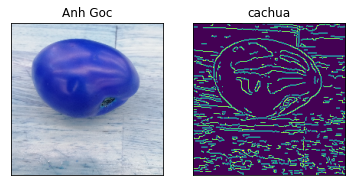

done 250 image


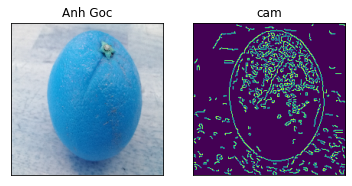

done 250 image


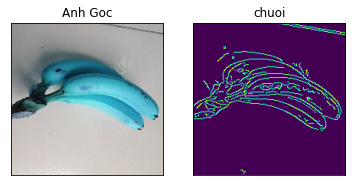

done 250 image


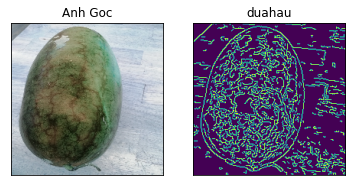

done 250 image


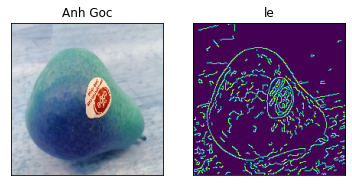

done 250 image


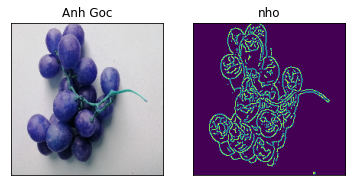

done 250 image


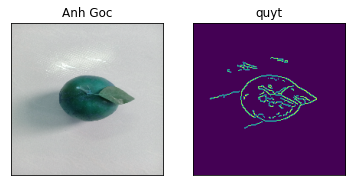

done 250 image


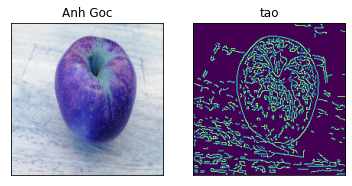

done 250 image


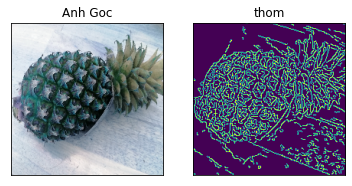

done 250 image


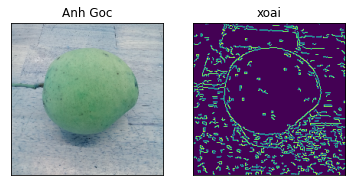

In [ ]:
path = '/content/drive/My Drive/Fruit recognition/data'
name_fruits = ['cachua', 'cam', 'chuoi', 'duahau', 'le', 'nho', 'quyt', 'tao', 'thom', 'xoai']
dataset_train = {}
dataset_test = {}
test_size = 0.25
number = 1
dim = (200, 200)

for name in name_fruits:
  index = 0
  images_train = []
  images_test = []
  while index < 250:
    img_path = path+'/'+name+'/'+name+'_'+str(index)+'.jpg'
    
    #print(img_path)
    fruit_img = cv2.imread(img_path)
    fruit_img = cv2.resize(fruit_img, dim)
    #fruit_img = cv2.cvtColor(fruit_img,cv2.COLOR_BGR2RGB)
    edge = Canny_Detect(fruit_img)

    if len(images_test) < test_size*(len(os.listdir(path+'/'+name))):
      images_test.append(edge)
    else:
      images_train.append(edge)
    #cv2_imshow(rb_img)
    if index == 249:
      print('done {} image'.format(index + 1))
      figure_size = 6
      plt.figure(figsize=(figure_size,figure_size))
      plt.subplot(1,2,1),plt.imshow(fruit_img)
      plt.title('Anh Goc'), plt.xticks([]), plt.yticks([])
      plt.subplot(1,2,2),plt.imshow(edge)
      plt.title(name), plt.xticks([]), plt.yticks([])
    
      plt.show()
    index+=1
  dataset_train[name] = images_train
  dataset_test[name] = images_test

In [ ]:
def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 40):
        for x in range(0, img.shape[1], 40):
            
            # Cropping the image into a section.
            section_img = img[y:y+40, x:x+40]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [ ]:
all_imgs = np.zeros((1, 50), dtype='uint8')

progress_counter = 0
name = []
section_mean = []
section_std = []
for fruits in dataset_train: 
    for img in dataset_train[fruits]:

        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name.append (fruits)

all_imgs = all_imgs[1:]

In [ ]:
feature_name = []
section = 1
for y in range(0, 200, 40):
    for x in range(0, 200, 40):
        feature_name.append(f"sec{section}_mean")
        feature_name.append(f"sec{section}_std")
        section += 1

In [ ]:
tb_train = pd.DataFrame(all_imgs, columns= feature_name)
print (tb_train.shape)
name_col = name
tb_train.insert(loc = 0, column = "Fruits", value= name_col)
tb_train.head

(1870, 50)


<bound method NDFrame.head of       Fruits  sec1_mean   sec1_std  ...   sec24_std  sec25_mean   sec25_std
0     cachua   0.796875  14.232643  ...   83.604911   13.706250   57.508543
1     cachua  22.950000  72.976349  ...   79.587828   27.890625   79.587828
2     cachua  11.156250  52.157280  ...   62.012851   27.412500   78.985710
3     cachua  21.196875  70.398122  ...   97.701425   24.862500   75.642538
4     cachua   4.781250  34.588414  ...   76.073145   23.109375   73.204149
...      ...        ...        ...  ...         ...         ...         ...
1865    xoai  14.025000  58.134967  ...   99.015879   53.709375  103.976890
1866    xoai  10.996875  51.800308  ...   90.423931   48.928125  100.412701
1867    xoai  14.981250  59.964831  ...   85.228380   44.306250   96.618062
1868    xoai  25.500000  76.500000  ...  100.287787   48.131250   99.784024
1869    xoai  16.734375  63.144488  ...   99.144957   41.596875   94.217319

[1870 rows x 51 columns]>

In [ ]:
tb_train.to_csv("/content/drive/My Drive/Fruit recognition/output_input/No cluster train.csv", index = False)

In [ ]:
all_imgs = np.zeros((1, 50), dtype='uint8')

progress_counter = 0
name_test = []
section_mean = []
section_std = []
for fruits in dataset_test: 
    for img in dataset_test[fruits]:


        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name_test.append (fruits)

all_imgs = all_imgs[1:]

In [ ]:
tb_test = pd.DataFrame(all_imgs, columns= feature_name)
print (tb_test.shape)
name_col = name_test
tb_test.insert(loc = 0, column = "Fruits", value= name_col)
tb_test.head

(630, 50)


<bound method NDFrame.head of      Fruits  sec1_mean    sec1_std  ...   sec24_std  sec25_mean   sec25_std
0    cachua  25.818750   76.923166  ...   96.618062   32.353125   84.872388
1    cachua  14.343750   58.752984  ...   74.327552   27.890625   79.587828
2    cachua  20.718750   69.670759  ...   67.676413   25.340625   76.287038
3    cachua  22.950000   72.976349  ...   89.463194   52.115625  102.827263
4    cachua   6.056250   38.828670  ...   60.559145   36.496875   89.301071
..      ...        ...         ...  ...         ...         ...         ...
625    xoai  31.078125   83.421053  ...  108.809014   50.681250  101.760157
626    xoai  46.218750   98.232420  ...  102.710232   45.103125   97.298535
627    xoai  38.728125   91.519420  ...  107.919825   52.275000  102.943914
628    xoai  51.159375  102.119337  ...  104.089812   48.290625   99.910585
629    xoai  43.190625   95.646115  ...  103.291600   53.231250  103.635914

[630 rows x 51 columns]>

In [ ]:
tb_test.to_csv("/content/drive/My Drive/Fruit recognition/output_input/No cluster test.csv", index = False)

In [ ]:
data_train = pd.read_csv('/content/drive/My Drive/Fruit recognition/output_input/No cluster train.csv')
data_train

,Fruits,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,cachua,0.796875,14.232643,11.315625,52.511342,13.865625,57.822823,7.171875,42.159131,1.593750,20.096423,12.750000,55.575962,15.300000,60.559145,40.481250,93.187913,26.456250,77.758669,19.762500,68.182704,35.540625,88.316042,22.312500,72.054423,12.271875,54.577735,15.300000,60.559145,26.934375,78.376049,27.093750,78.580118,31.396875,83.788062,10.200000,49.969591,29.643750,81.733740,17.850000,65.062489,42.553125,95.080379,34.584375,87.309430,40.162500,92.889241,31.237500,83.604911,13.706250,57.508543
1,cachua,22.950000,72.976349,18.965625,66.906946,31.715625,84.152264,29.643750,81.733740,27.571875,79.187245,51.478125,102.356849,33.946875,86.625994,35.381250,88.149792,29.165625,81.157875,40.800000,93.484544,55.781250,105.416654,14.821875,59.664815,6.056250,38.828670,8.287500,45.217583,28.368750,80.182575,23.428125,73.656601,23.906250,74.327552,7.331250,42.611284,16.096875,62.012851,20.718750,69.670759,20.240625,68.932405,32.512500,85.050719,29.165625,81.157875,27.890625,79.587828,27.890625,79.587828
2,cachua,11.156250,52.157280,12.909375,55.903834,11.953125,53.899626,8.287500,45.217583,10.996875,51.800308,27.253125,78.783336,18.965625,66.906946,43.350000,95.786364,29.803125,81.924176,17.850000,65.062489,8.925000,46.863839,26.775000,78.171122,9.721875,48.831990,32.193750,84.693381,27.412500,78.985710,26.775000,78.171122,34.743750,87.478729,25.500000,76.500000,28.528125,80.379213,47.493750,99.273612,37.771875,90.582082,39.046875,91.827527,19.284375,67.421276,16.096875,62.012851,27.412500,78.985710
3,cachua,21.196875,70.398122,15.300000,60.559145,19.762500,68.182704,26.615625,77.965331,24.862500,75.642538,20.240625,68.932405,17.212500,63.975912,20.559375,69.425879,38.568750,91.364560,40.959375,93.632100,23.587500,73.881272,37.293750,90.105951,28.528125,80.379213,26.615625,77.965331,52.434375,103.060186,43.828125,96.204300,16.893750,63.423241,6.215625,39.323662,27.093750,78.580118,38.887500,91.673741,53.709375,103.976890,45.262500,97.433278,26.456250,77.758669,45.581250,97.701425,24.862500,75.642538
4,cachua,4.781250,34.588414,4.143750,32.241054,10.200000,49.969591,7.331250,42.611284,20.718750,69.670759,21.037500,70.156868,15.937500,61.725672,33.468750,86.106759,29.643750,81.733740,31.078125,83.421053,25.021875,75.858315,21.037500,70.156868,18.487500,66.125070,15.459375,60.853499,14.981250,59.964831,32.193750,84.693381,22.471875,72.286534,8.925000,46.863839,13.068750,56.229343,14.025000,58.134967,41.756250,94.362383,19.125000,67.164793,15.140625,60.262931,25.181250,76.073145,23.109375,73.204149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,xoai,14.025000,58.134967,14.343750,58.752984,10.200000,49.969591,18.646875,66.387101,11.634375,53.210966,41.915625,94.506956,27.571875,79.187245,3.187500,28.331120,14.821875,59.664815,7.490625,43.058099,24.543750,75.208115,32.512500,85.050719,8.925000,46.863839,3.028125,27.622497,14.025000,58.134967,26.775000,78.171122,35.859375,88.646748,29.484375,81.542549,18.168750,65.596706,37.771875,90.582082,31.556250,83.970512,11.475000,52.862552,45.103125,97.298535,47.175000,99.015879,53.709375,103.976890
1866,xoai,10.996875,51.800308,13.706250,57.508543,11.475000,52.862552,21.834375,71.351424,4.621875,34.017883,24.225000,74.769809,26.296875,77.551128,6.693750,40.768860,10.678125,51.077388,11.156250,52.157280,38.728125,91.519420,38.2500

In [ ]:
data_test = pd.read_csv('/content/drive/My Drive/Fruit recognition/output_input/No cluster test.csv')
data_test

,Fruits,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,cachua,25.818750,76.923166,31.237500,83.604911,47.971875,99.657049,35.859375,88.646748,36.656250,89.463194,40.162500,92.889241,42.712500,95.222528,40.481250,93.187913,36.337500,89.138368,26.456250,77.758669,54.028125,104.202368,22.790625,72.747486,30.759375,83.051198,25.021875,75.858315,37.612500,90.423931,52.115625,102.827263,22.631250,72.517551,9.403125,48.055989,10.678125,51.077388,21.515625,70.877093,35.859375,88.646748,27.571875,79.187245,32.671875,85.228380,44.306250,96.618062,32.353125,84.872388
1,cachua,14.343750,58.752984,14.821875,59.664815,13.706250,57.508543,16.415625,62.582039,10.200000,49.969591,10.837500,51.440364,39.843750,92.588508,53.231250,103.635914,25.978125,77.133384,3.028125,27.622497,24.543750,75.208115,14.821875,59.664815,20.081250,68.683784,19.125000,67.164793,19.603125,67.930217,9.243750,47.662452,10.040625,49.593802,13.387500,56.873433,16.415625,62.582039,18.646875,66.387101,43.190625,95.646115,33.787500,86.453556,22.631250,72.517551,23.906250,74.327552,27.890625,79.587828
2,cachua,20.718750,69.670759,38.568750,91.364560,51.000000,102.000000,36.815625,89.624741,32.990625,85.581704,43.828125,96.204300,26.456250,77.758669,30.121875,82.302799,31.715625,84.152264,30.918750,83.236483,47.334375,99.144957,7.171875,42.159131,19.603125,67.930217,6.375000,39.811862,35.700000,88.481693,34.265625,86.968968,6.375000,39.811862,0.000000,0.000000,15.459375,60.853499,21.356250,70.638193,31.875000,84.333323,40.481250,93.187913,38.090625,90.896720,19.443750,67.676413,25.340625,76.287038
3,cachua,22.950000,72.976349,27.571875,79.187245,36.815625,89.624741,52.912500,103.406745,39.525000,92.285694,11.156250,52.157280,32.193750,84.693381,14.025000,58.134967,22.153125,71.821208,56.737500,106.060919,16.415625,62.582039,29.643750,81.733740,14.662500,59.362855,21.196875,70.398122,39.206250,91.980779,26.296875,77.551128,20.559375,69.425879,37.293750,90.105951,48.450000,100.036731,40.321875,93.038833,28.846875,80.770112,13.546875,57.192091,19.125000,67.164793,36.656250,89.463194,52.115625,102.827263
4,cachua,6.056250,38.828670,12.431250,54.912956,14.662500,59.362855,18.646875,66.387101,21.515625,70.877093,42.712500,95.222528,36.815625,89.624741,32.353125,84.872388,29.643750,81.733740,14.343750,58.752984,36.815625,89.624741,32.671875,85.228380,9.881250,49.214628,19.125000,67.164793,9.243750,47.662452,40.481250,93.187913,37.453125,90.265222,18.487500,66.125070,21.675000,71.114832,14.821875,59.664815,49.565625,100.908291,38.568750,91.364560,44.625000,96.891611,15.300000,60.559145,36.496875,89.301071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,xoai,31.078125,83.421053,34.584375,87.309430,30.759375,83.051198,32.193750,84.693381,32.671875,85.228380,42.871875,95.364199,31.715625,84.152264,21.196875,70.398122,36.496875,89.301071,48.290625,99.910585,60.562500,108.515534,26.296875,77.551128,12.271875,54.577735,21.356250,70.638193,66.937500,112.198189,39.365625,92.133501,39.525000,92.285694,54.984375,104.870082,41.118750,93.779154,23.109375,73.204149,44.465625,96.755065,59.925000,108.119699,50.362500,101.518747,61.040625,108.809014,50.681250,101.760157
626,xoai,46.218750,98.232420,39.206250,91.980779,36.337500,89.138368,39.684375,92.437363,23.268750,73.430896,46.856250,98.756446,26.775000,78.171122,19.125000,67.164793,37.612500,90.423931,49.725000,101.031180,47.49375

In [ ]:
label_train = data_train['Fruits']
features_train = data_train.drop(['Fruits'], axis = 1)
label_test = data_test['Fruits']
features_test = data_test.drop(['Fruits'], axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [ ]:
models = []
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('knn', KNeighborsClassifier()))


for name, model in models:
  print(name)
  model.fit(features_train, label_train)
  pred = model.predict(features_test)
  print('\ttest', accuracy_score(label_test, pred))
  #print (pred)

rfc
	test 0.8095238095238095
svc
	test 0.8238095238095238
knn
	test 0.7825396825396825


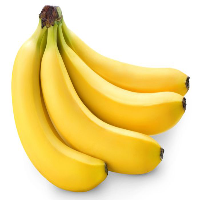

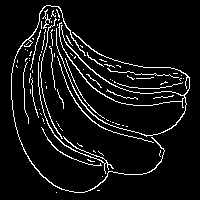

In [ ]:
img = io.imread("https://cdn.mos.cms.futurecdn.net/42E9as7NaTaAi4A6JcuFwG-1200-80.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
resized = cv2.resize (img, (200,200))
cv2_imshow(resized)
edge1 = Canny_Detect(resized)
cv2_imshow(edge1)

In [ ]:
def edge_extract(img):
  all_imgs = np.zeros((1, 50), dtype='uint8')

  progress_counter = 0

  resized = cv2.resize (img, (200,200))

  img_features = features_grid(img)
  img_features = img_features.reshape(1, img_features.shape[0])

  all_imgs = np.append(all_imgs, img_features, axis=0)
  progress_counter += 1
  all_imgs = all_imgs[1:]
  return all_imgs

In [ ]:
df = pd.DataFrame(edge_extract(edge1))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,7.96875,44.368122,45.103125,97.298535,0.478125,11.031467,0.0,0.0,0.0,0.0,28.209375,79.985135,47.971875,99.657049,34.425,87.139511,17.85,65.062489,11.475,52.862552,22.95,72.976349,29.9625,82.113861,34.74375,87.478729,23.26875,73.430896,26.775,78.171122,7.96875,44.368122,31.396875,83.788062,21.675,71.114832,16.096875,62.012851,8.60625,46.049172,3.825,30.995877,9.5625,48.445806,21.515625,70.877093,7.96875,44.368122,0.6375,12.734053


In [ ]:
for name, model in models:
    pred = model.predict(df)
    print (pred)

['chuoi']
['chuoi']
['chuoi']
